# Rural Hospitals are in trouble and Payer Mix is at least partially to blame:
Since 2005, a rural hospital closes in America every 30 days on average  according to UNC’s SHEPS center program on Rural Hospital Closures. This trend is only accelerating. In 2020 according to Becker’s  the rate of closure was every 18 days.  This means more and more Americans, a fifth of which live in rural America have to go farther to receive inpatient hospital level care. In addition, in many communities’ hospitals are not only a source of health but also a major employer. The question of why these hospitals close is a complex issue but one that has a dramatic impact on the lives of 1 in 5 Americans.

# What is Payer Mix?:
Payor mix refers to a health systems distribution of third-party payer types.  Typically, private insurance pays the most per episodes, followed by Medicare, Medicaid and lastly Self-Pay. Self-Pay is the industry term for patients without any insurance. Unlike any other business in America hospitals must treat and stabilize who cannot pay . This is for good reason. Under EMTALA rules patients must be seen in the ER and treated for their acute conditions. The American College of Emergency Physicians describes this as “unfunded mandate” .

Imagine instead of a hospital one were talking about a coffee shop which had to serve coffee to whomever came in. Instead of one price for a cup each customer received a different price depending on the plan they were a member of. The Private Coffee plan members paid \\$2 a cup. The Coffeecare members paid \\$1.2 a cup and the Coffeecaid members paid 90 cents a cup. Finally, there were folks who were not members of any plan. They could pay 50 cents today, but still needed to get coffee today. If coffee costs a business a \\$1 per cup one can quickly see how the “mix” of these different types will cause  the coffee shop to remain open or will cause it close.

In [ ]:
from random import choices
import pandas as pd

import matplotlib

In [104]:

#cost_of_coffee=1.3
weights = [self_pay,Medicaid,Medicare,Private]
#weights = [.5,1,2,3]

def determine_payer(x):
    if x==.5:
        return "Self_Pay"
    elif x==.9:
        return "Medicaid"
    elif x==1.2:
        return "Medicare"
    else:
        return "Private"
def subtract_cost(x):
    return float(x)-cost_of_coffee


matplotlib.style.use('fivethirtyeight') 

population = [.5,.9,1.2,2]


i=0
payment_list=[]
payer_mix_list=[]
while i<1000:
    ch=choices(population, weights)
    mx=determine_payer(ch[0])
    payment_list.append(ch[0])
    payer_mix_list.append(mx)
    i+=1
    
d=zip(payment_list,payer_mix_list)


In [105]:
df = pandas.DataFrame(d, columns=['Payment','PayerType'])


In [106]:
df['gain_loss']=df['Payment'].apply(subtract_cost)

In [107]:
grouped=df.groupby(['PayerType']).count()
grouped_profit=df.groupby(['PayerType']).sum()

In [108]:
gdf=grouped.reset_index()

In [109]:
#print(grouped)

           Payment  gain_loss
PayerType                    
Medicaid       165        165
Medicare       291        291
Private        465        465
Self_Pay        79         79


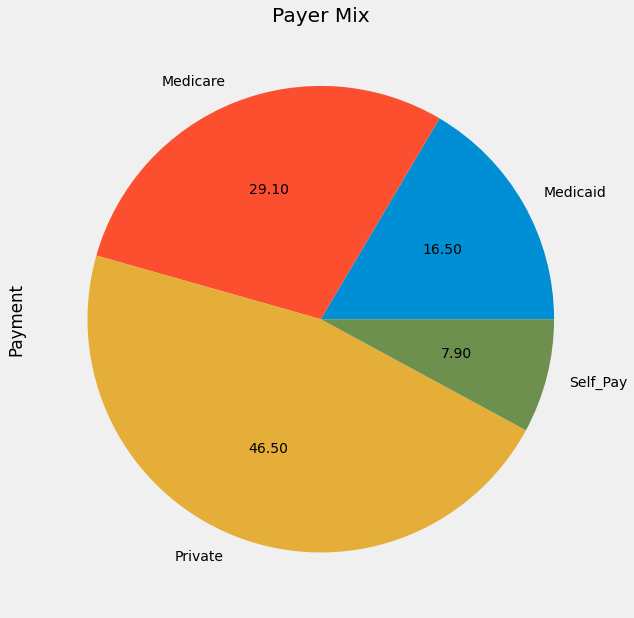

In [116]:
plot = grouped['Payment'].plot.pie(figsize=(10,10),autopct='%.2f',title="Payer Mix")

In [111]:
## all credit for styling goes to:https://towardsdatascience.com/make-your-pandas-dataframe-output-report-ready-a9440f6045c6

def highlight_number(row):
    return [
        'background-color: red; color: white' if cell <= 0 
        else 'background-color: green; color: white'
        for cell in row
    ]

grouped_profit.style \
  .apply(highlight_number) \
  .format('${0:,.2f}') \
  .set_caption('Revenues and P/L by Payer') \
  .set_properties(padding="20px", border='2px solid white')

,Payment,gain_loss
PayerType,,
Medicaid,$148.50,$-66.00
Medicare,$349.20,$-29.10
Private,$930.00,$325.50
Self_Pay,$39.50,$-63.20


<AxesSubplot:title={'center':'P/L Over Customer Time'}, xlabel='Number of Customer', ylabel='Profit and Loss'>

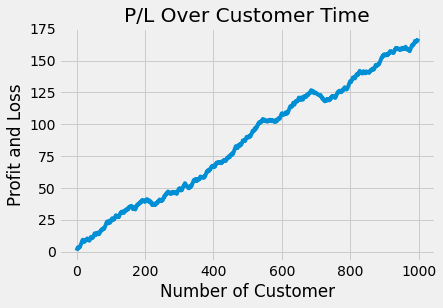

In [117]:
df['gain_loss'].cumsum().plot(ylabel="Profit and Loss",xlabel="Number of Customer", title="P/L Over Customer Time")